In [1]:
#############################Objectives#################################
#Featrure Selection using SelectKBest using Chi2 method
#Logistic Regression Demo, Classification Metrics
#MinMax Scaling -Feature Scaling Method


#####Challenges#####################

#churn data suffer from imbalanced class classification problem
# to deal with this challenge, smote oversampling method is used here [Synthetic Minority Oversampling Technique]

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
churn_data=pd.read_csv("Downloads/Churn_Modelling.csv")

In [5]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn_data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
churn_data['Gender']=churn_data['Gender'].map({'Male':1,'Female':0})

In [9]:
churn_data['Geography']=churn_data['Geography'].map({'France':0,'Germany':1,'Spain':2})

In [10]:
X=churn_data.drop(columns=['Exited'],axis=1)

In [11]:
y=churn_data['Exited']

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [13]:
X.drop(columns=['HasCrCard'],axis=1,inplace=True)#previous tutorial have indicated that hascreditcard column 
                                                 #has no significant effect on Exited column, therefore drop the column

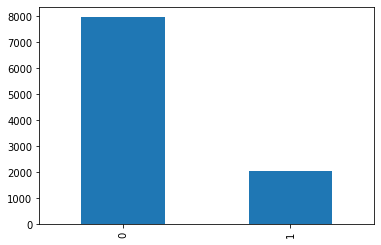

In [14]:
y.value_counts().plot(kind="bar")#Since Target class has imbalance classification therefore accuracy will be biased towards
                                # majority

In [15]:
#without K-Selector

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
x_train.shape,x_test.shape

((8000, 9), (2000, 9))

In [18]:
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 

In [19]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 6346
After OverSampling, counts of label '0': 6346


In [20]:
#norm=StandardScaler().fit(x_train_res)# fit scaler on training data
norm=MinMaxScaler().fit(x_train_res)# fit scaler on training data

In [21]:
# transform training data
x_train_norm = norm.transform(x_train_res)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression(random_state=2,solver='lbfgs')

In [24]:
model.fit(x_train_norm,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=model.predict(x_test_norm)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,\
                            roc_curve,precision_score,f1_score,recall_score

In [27]:
log_roc_auc=roc_auc_score(y_test,y_pred)

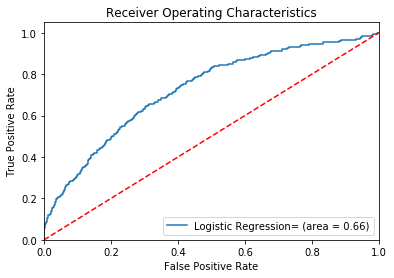

In [28]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test_norm)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression= (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [29]:
results=pd.DataFrame([["Logistic Regression", accuracy_score(y_test,y_pred)*100,\
               precision_score(y_test,y_pred),recall_score(y_test,y_pred),\
               f1_score(y_test,y_pred),cohen_kappa_score(y_test,y_pred)]],columns=['Model', 'Accuracy', 'Precision',\
                                                  'Recall','F1 Score','kappa Score'])

In [30]:
confusion_matrix(y_test,y_pred)

array([[1225,  392],
       [ 171,  212]], dtype=int64)

In [31]:
results

,Model,Accuracy,Precision,Recall,F1 Score,kappa Score
0,Logistic Regression,71.85,0.350993,0.553525,0.429585,0.254964


In [32]:
#with K Selector

In [33]:
sel_feature=SelectKBest(chi2,k=8).fit(X,y)

In [34]:
sel_bool=sel_feature.get_support()

In [35]:
X_Sel=X[X.columns[sel_bool]]

In [36]:
X_Sel.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,619,0,0,42,0.00,1,1,101348.88
1,608,2,0,41,83807.86,1,1,112542.58
2,502,0,0,42,159660.80,3,0,113931.57
3,699,0,0,39,0.00,2,0,93826.63
4,850,2,0,43,125510.82,1,1,79084.10


In [37]:
x_train,x_test,y_train,y_test=train_test_split(X_Sel,y,test_size=0.2,random_state=2)


In [38]:
x_train.shape,x_test.shape

((8000, 8), (2000, 8))

In [39]:
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 



In [40]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (12692, 8)
After OverSampling, the shape of train_y: (12692,) 



In [41]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 6346
After OverSampling, counts of label '0': 6346


In [42]:
#min-max scaling for feature scaling.
#STANDARD SCALING

In [43]:

x_test=x_test[X.columns[sel_bool]]

In [44]:
#norm=StandardScaler().fit(x_train_res)# fit scaler on training data
norm=MinMaxScaler().fit(x_train_res)# fit scaler on training data


In [45]:
# transform training data
x_train_norm = norm.transform(x_train_res)

# transform testing dataabs
x_test_norm = norm.transform(x_test)



In [46]:
#Logistic Regression

In [47]:
model=LogisticRegression(random_state=2,solver='lbfgs')

In [48]:
model.fit(x_train_norm,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred=model.predict(x_test_norm)

In [50]:
log_roc_auc=roc_auc_score(y_test,y_pred)

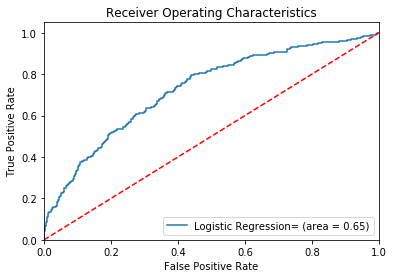

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test_norm)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression= (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [52]:
results=results.append(pd.DataFrame([["Logistic Regression with K Selector", accuracy_score(y_test,y_pred)*100,\
               precision_score(y_test,y_pred),recall_score(y_test,y_pred),\
               f1_score(y_test,y_pred),cohen_kappa_score(y_test,y_pred)]],columns=['Model', 'Accuracy', 'Precision',\
                                                  'Recall','F1 Score','kappa Score']),ignore_index=True)

In [53]:
confusion_matrix(y_test,y_pred)#with k-selector

array([[1237,  380],
       [ 177,  206]], dtype=int64)

In [54]:
results

,Model,Accuracy,Precision,Recall,F1 Score,kappa Score
0,Logistic Regression,71.85,0.350993,0.553525,0.429585,0.254964
1,Logistic Regression with K Selector,72.15,0.351536,0.537859,0.425181,0.251909
